In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import seaborn as sns

In [193]:
data = pd.read_csv('full_data.csv', sep=',', engine='python')

In [194]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [195]:
print(data.shape)
print(data.columns)

(4981, 11)
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [196]:
data[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


Посмотрим распределение данных по факту курения

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

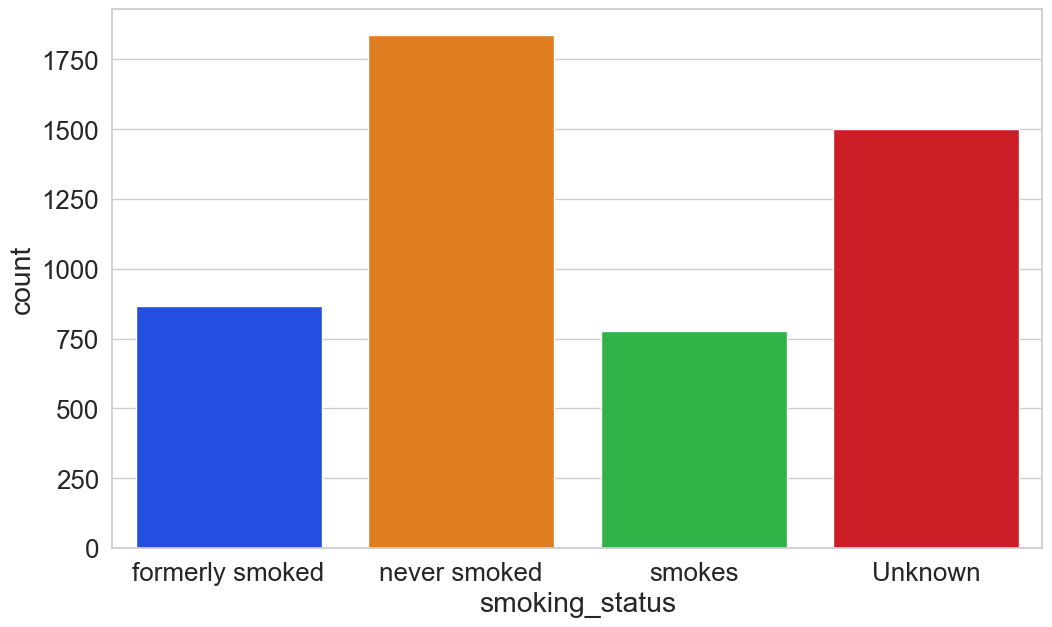

In [197]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='smoking_status', palette='bright')

Теперь посмотрим распределение людей по месту проживания

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

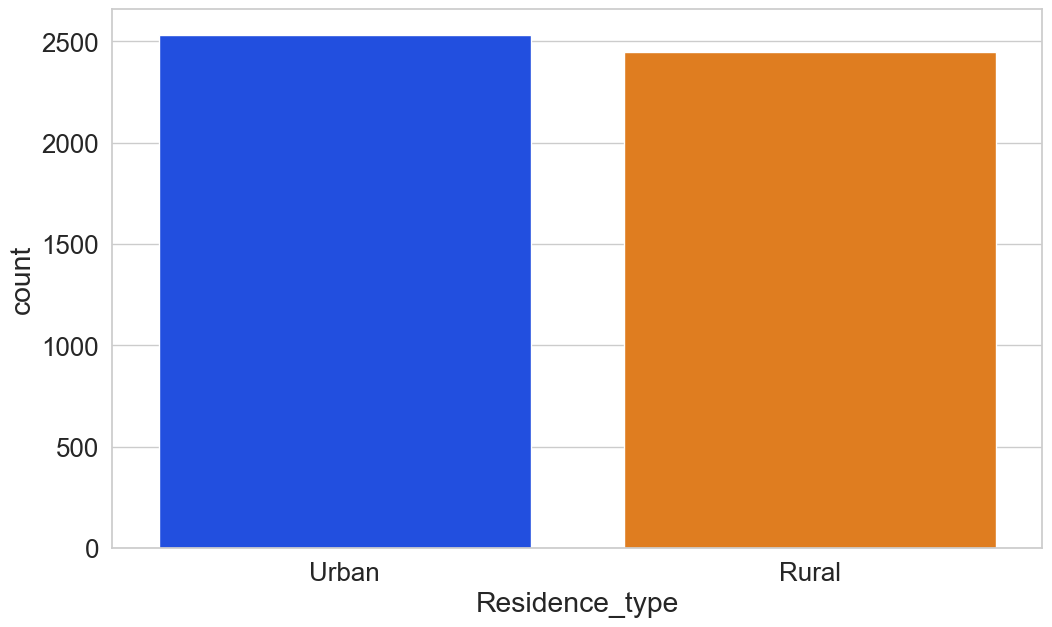

In [198]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='Residence_type', palette='bright')

<AxesSubplot:xlabel='stroke', ylabel='count'>

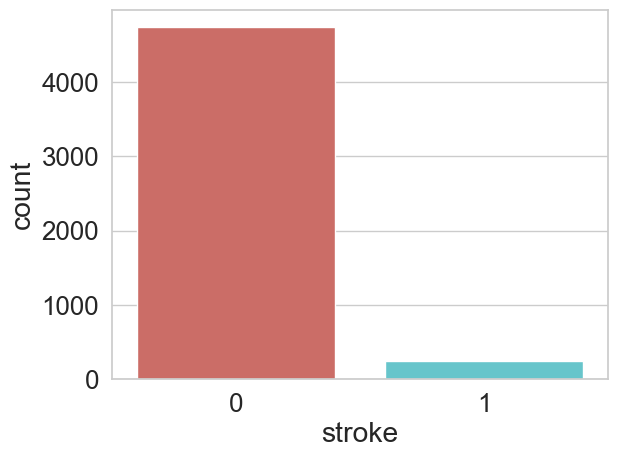

In [199]:
sns.countplot(x='stroke', data=data, palette='hls')

In [201]:
class_0 = len(data[data['stroke']==0])
class_1 = len(data[data['stroke']==1])
class_0,class_1

(4733, 248)

In [202]:
data = data[data['age'] >= 35] # убираем данные, где возраст меньше 35 лет

In [203]:
class_0 = len(data[data['stroke']==0])
class_1 = len(data[data['stroke']==1])
class_0,class_1

(2948, 245)

# Готовим данные

In [204]:
data = data.astype({'age': np.int32})

In [205]:
data.loc[(data.gender == 'Male'), 'gender'] = 0
data.loc[(data.gender == 'Female'), 'gender'] = 1

In [206]:
data.loc[(data.ever_married == 'Yes'), 'ever_married'] = 1
data.loc[(data.ever_married == 'No'), 'ever_married'] = 0

In [207]:
data.loc[(data.Residence_type == 'Urban'), 'Residence_type'] = 1
data.loc[(data.Residence_type == 'Rural'), 'Residence_type'] = 0

In [208]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [209]:
data.loc[(data.smoking_status == 'formerly smoked'), 'smoking_status'] = 1
data.loc[(data.smoking_status == 'never smoked'), 'smoking_status'] = 2
data.loc[(data.smoking_status == 'smokes'), 'smoking_status'] = 3
data.loc[(data.smoking_status == 'Unknown'), 'smoking_status'] = 0

In [210]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job'], dtype=object)

In [211]:
data.loc[(data.work_type == 'Private'), 'work_type'] = 1
data.loc[(data.work_type == 'Self-employed'), 'work_type'] = 2
data.loc[(data.work_type == 'Govt_job'), 'work_type'] = 3

In [212]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,1,1,228.69,36.6,1,1
1,0,80,0,1,1,1,0,105.92,32.5,2,1
2,1,49,0,0,1,1,1,171.23,34.4,3,1
3,1,79,1,0,1,2,0,174.12,24.0,2,1
4,0,81,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41,0,0,0,1,0,70.15,29.8,1,0
4977,0,40,0,0,1,1,1,191.15,31.1,3,0
4978,1,45,1,0,1,3,0,95.02,31.8,3,0
4979,0,40,0,0,1,1,0,83.94,30.0,3,0


Так как теперь все данные числовые, мы можем построить корреляционную матрицу

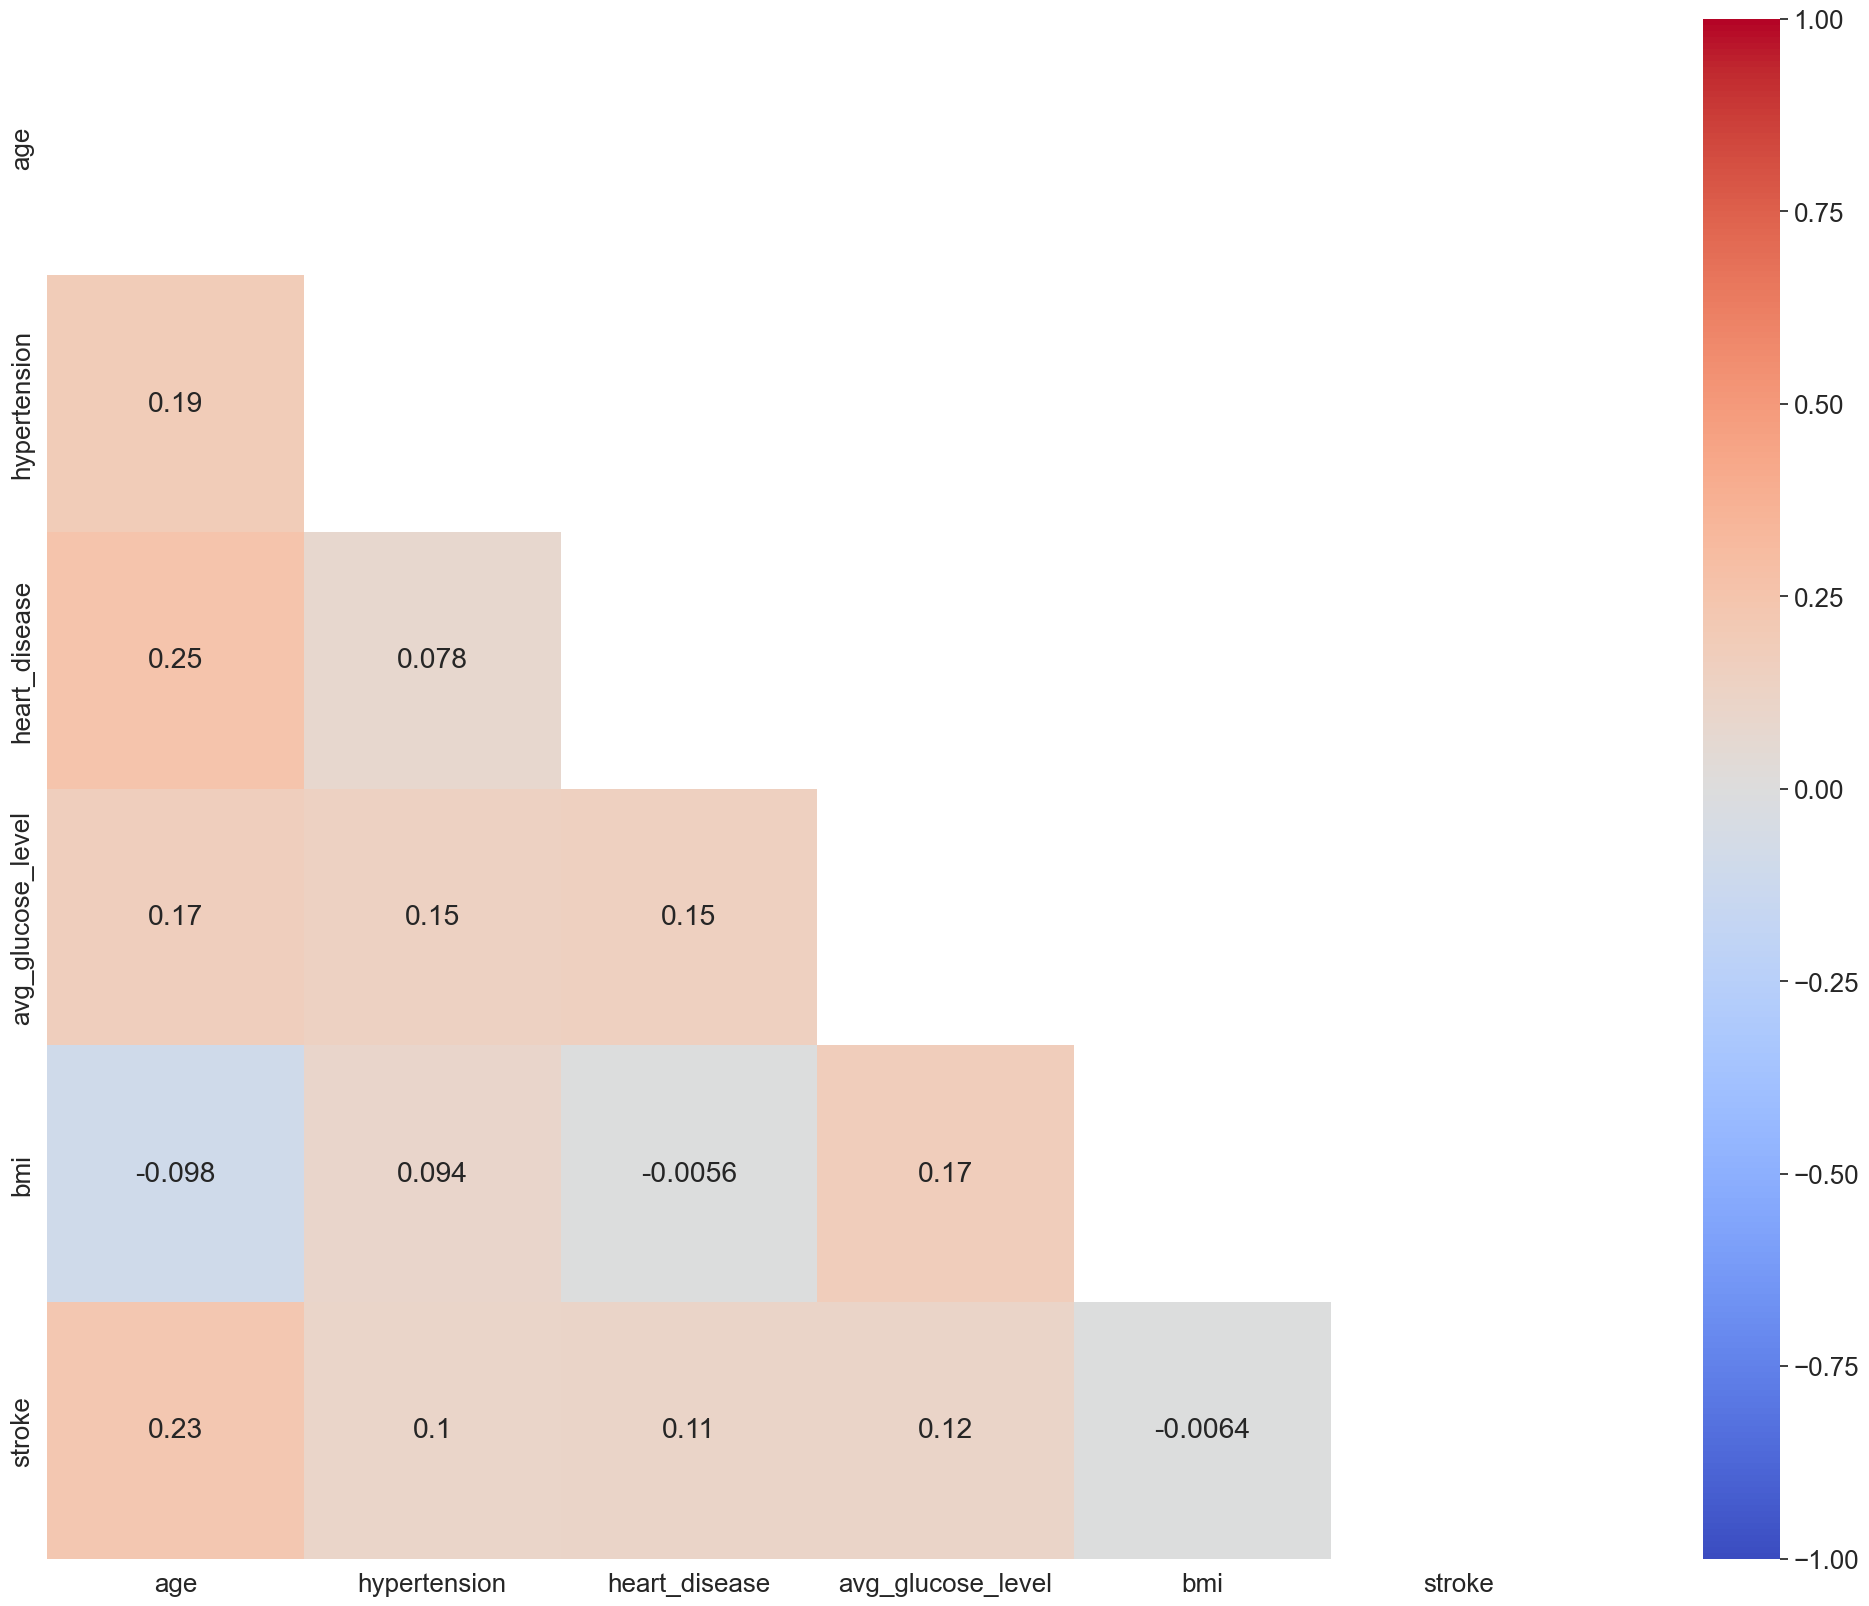

In [213]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=mask, square=True)

<AxesSubplot:xlabel='stroke', ylabel='count'>

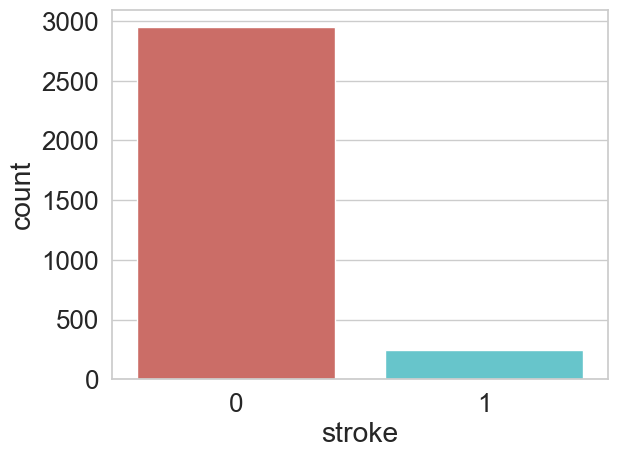

In [214]:
sns.countplot(x='stroke', data=data, palette='hls') #имеем сильно неравное распределение по классам

In [215]:
count_0 = len(data[data['stroke']==0])
count_1 = len(data[data['stroke']==1])
pct_of_0 = count_0 / (count_0+count_1)
print("Нет заболевание: ", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("Есть заболевания: ", pct_of_1*100)

Нет заболевание:  92.32696523645475
Есть заболевания:  7.673034763545256


# X и y

In [216]:
X = data.drop('stroke', axis = 1) # выбрасываем столбец 'stroke'
y = data['stroke']

In [217]:
X = X.to_numpy()
y = np.array(y)

In [218]:
print(X.shape)
print(y.shape)
N, d = X.shape

(3193, 10)
(3193,)


In [219]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 777)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

print(N_train, N_test)

2235 958


# Random Forest

In [220]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

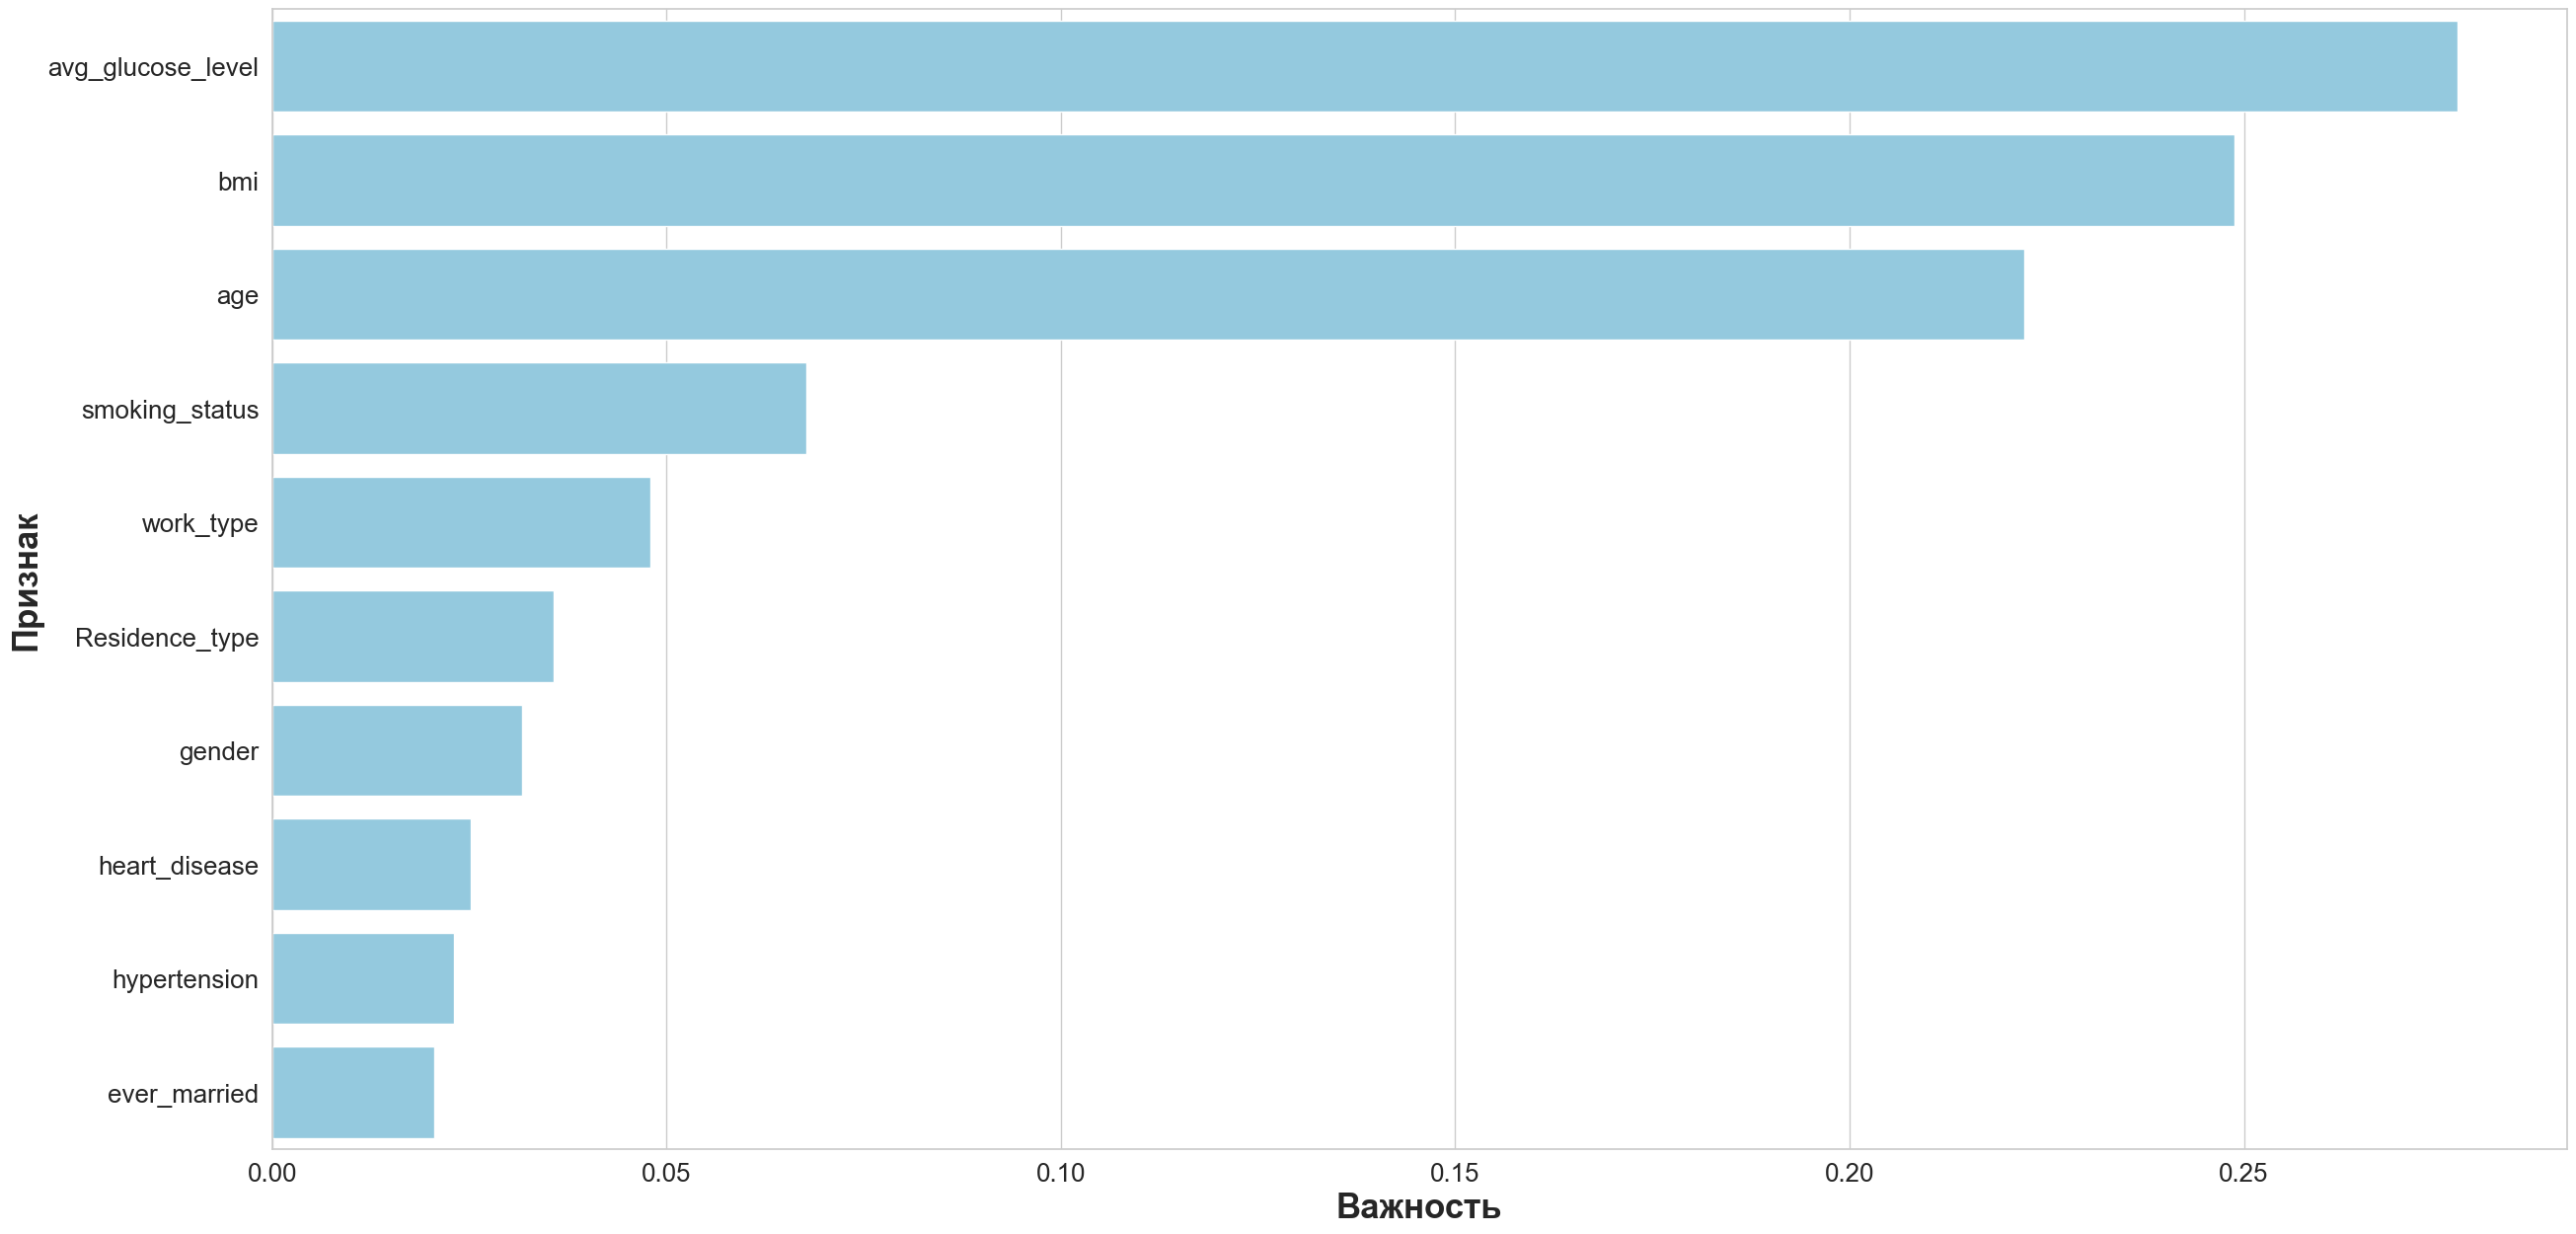

None

,Признак,Процент важности
0,avg_glucose_level,0.277092
1,bmi,0.248821
2,age,0.222196
3,smoking_status,0.067694
4,work_type,0.047958
5,Residence_type,0.035707
6,gender,0.031690
7,heart_disease,0.025134
8,hypertension,0.023108
9,ever_married,0.020598


In [221]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Процент важности'})
importances = importances.sort_values(by='Процент важности', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Признак'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Процент важности'], y=importances['Признак'], data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признак', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

# Заметим, что наиболее важными признаками для классификации оказались: уровень сахара в крови, индекс массы тела и возраст

Оценим результаты

In [222]:
error_train = np.mean(y_train != rfc.predict(X_train))
error_test  = np.mean(y_test  != rfc.predict(X_test))
print('Error on train = ', error_train)
print('Error on test = ', error_test)

Error on train =  0.0
Error on test =  0.08350730688935282


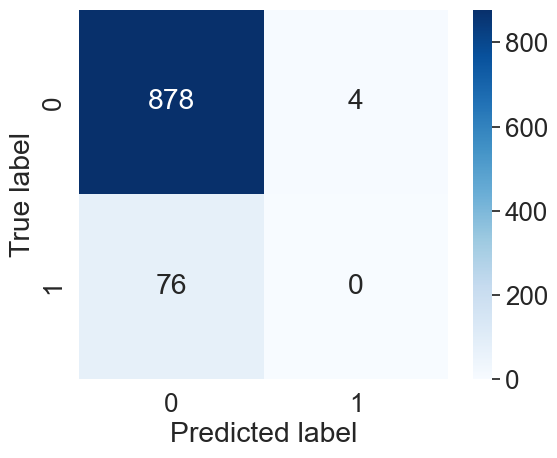

In [223]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

# Logistic Regression

In [224]:
from sklearn.linear_model import LogisticRegression

In [225]:
LogReg = LogisticRegression(max_iter=400)

In [226]:
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=400)

Оценим результаты

In [227]:
error_train = np.mean(y_train != LogReg.predict(X_train))
error_test  = np.mean(y_test  != LogReg.predict(X_test))
print('Error on train = ', error_train)
print('Error on test = ', error_test)

Error on train =  0.0756152125279642
Error on test =  0.08037578288100208


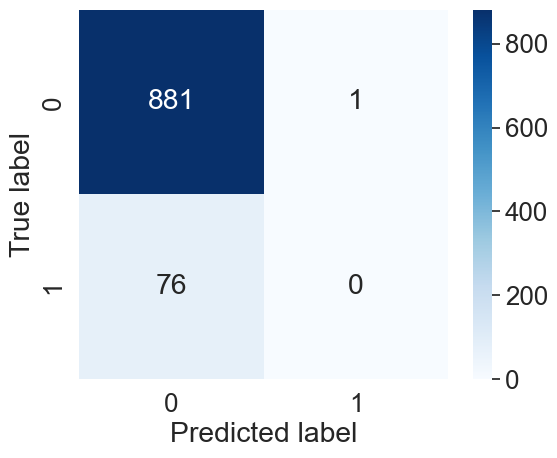

In [228]:
sns.heatmap(confusion_matrix(y_test, LogReg.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

# KNN

In [229]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [230]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
err_test

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.081419624217119

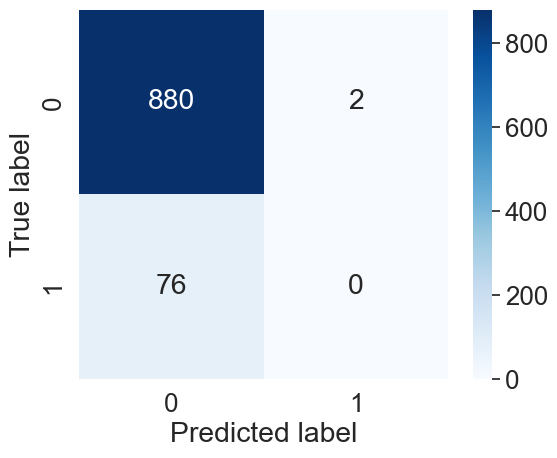

In [231]:
sns.heatmap(confusion_matrix(y_test, y_test_predict), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

# SVC

In [234]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.049217002237136466 0.081419624217119


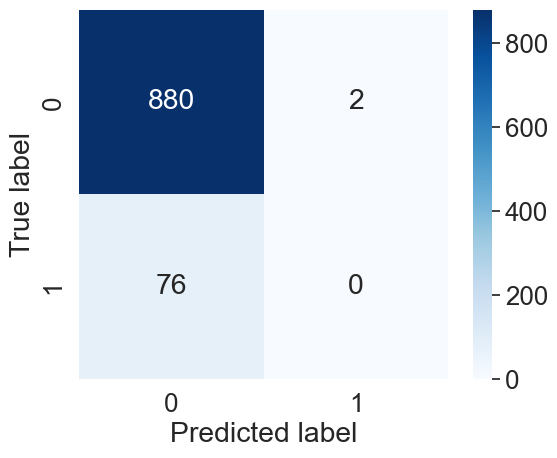

In [235]:
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

In [236]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC(gamma='auto')
grid = GridSearchCV(svc, cv=3, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

0.0756152125279641 1e-05


# Нейронная сеть с подбором параметров

In [237]:
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-4, 15, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (7, 7), max_iter=701, random_state = 42, alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

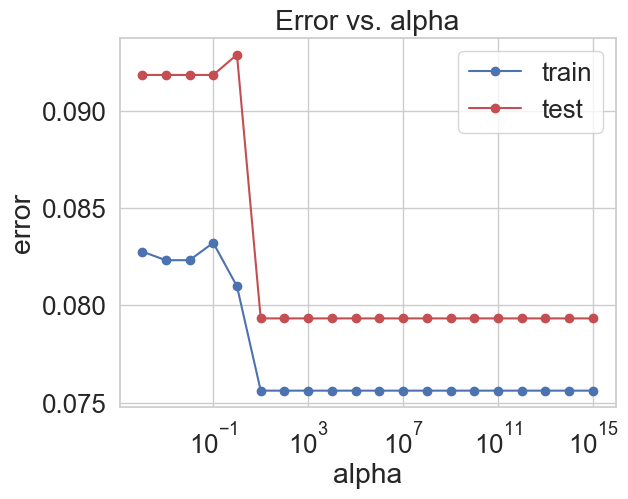

In [238]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [239]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0756152125279642 0.07933194154488518


# Попробуем сбалансировать классы и повторить исследование

In [240]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

<AxesSubplot:title={'center':'Распределение классов после SMOTE'}, xlabel='stroke'>

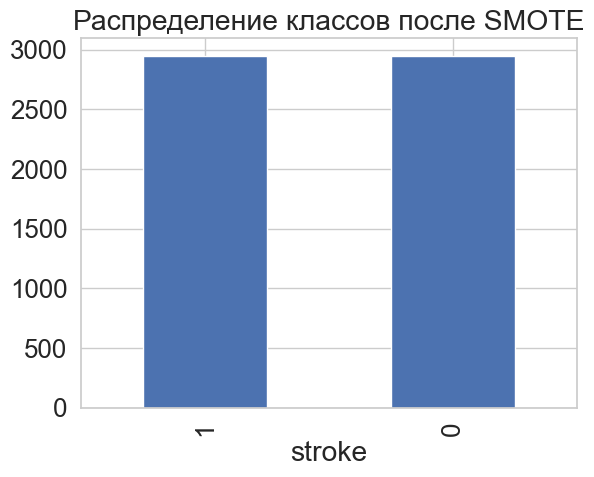

In [242]:
pd.Series(y_resampled).value_counts().plot(kind='bar', title='Распределение классов после SMOTE', xlabel='stroke')

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3, random_state = 777)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

print(N_train, N_test)

4127 1769


# Переделаем модели и сравним данные

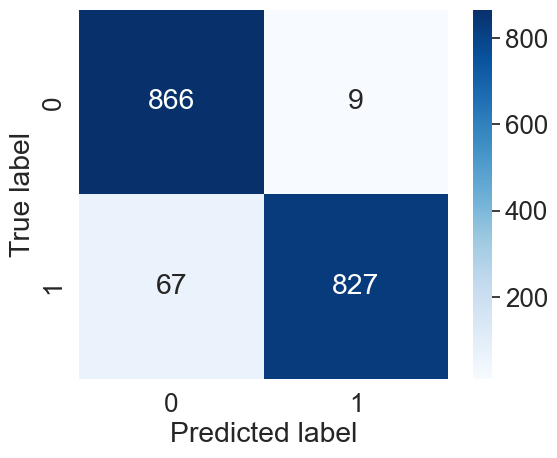

In [250]:
rfc_new = RandomForestClassifier()
rfc_new.fit(X_train, y_train)

sns.heatmap(confusion_matrix(y_test, rfc_new.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

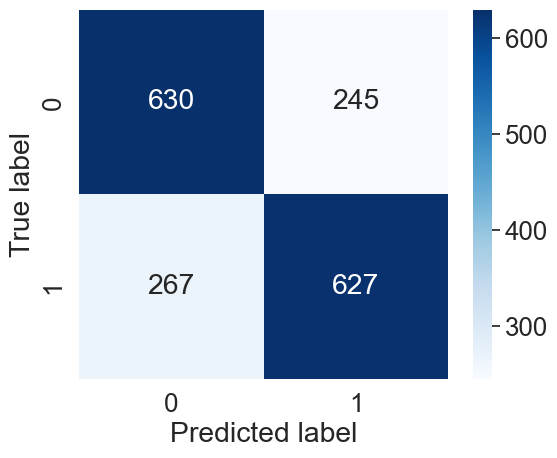

In [251]:
LogReg_new = LogisticRegression(max_iter=400)
LogReg_new.fit(X_train, y_train)

sns.heatmap(confusion_matrix(y_test, LogReg_new.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

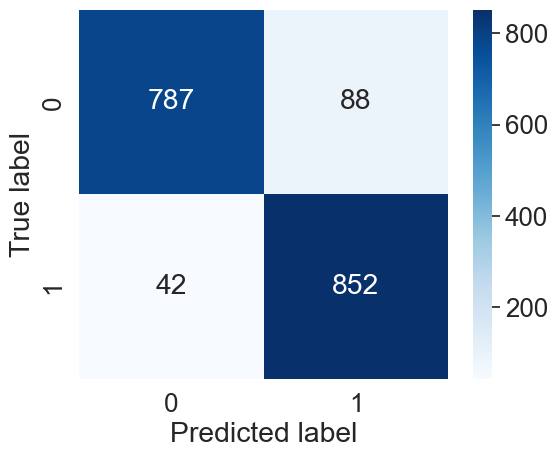

In [252]:
svc_new = SVC(gamma='auto')
svc_new.fit(X_train, y_train)

sns.heatmap(confusion_matrix(y_test, svc_new.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


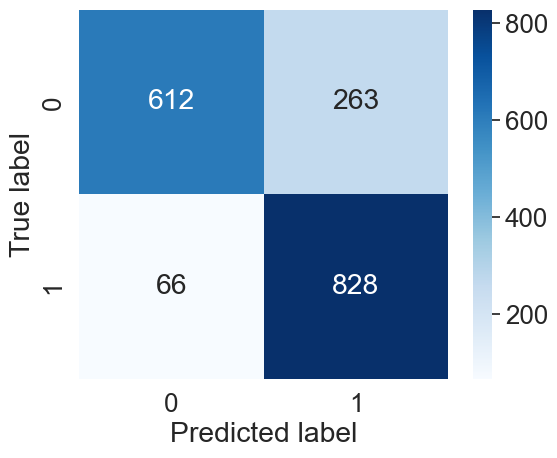

In [253]:
knn_new = KNeighborsClassifier(n_neighbors = 14)
knn_new.fit(X_train, y_train)

sns.heatmap(confusion_matrix(y_test, knn_new.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass